# Baseball Case Study - Evaluation Project

# Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

# Input Features:

Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors.

# Output Features:

 Number of predicted wins (W)

# Importing required libraries for the dataset

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading the dataset
df = pd.read_csv(r"C:\Users\Asus\Desktop\dataset\baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


It is observed that there are 30 rows and 17 columns.

In [8]:
#COnforming the rows and columns
df.shape

(30, 17)

In [9]:
#The info() function will give the information about each column datatype,memory usage, non null count,index.
df.info

<bound method DataFrame.info of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  2

It is observed that we dont no have any missing values in the dataset

In [11]:
# Using describe() function will help describe about each and every column mean value, standard deviation, count of values, quantile % range of (25,50,75) the data.

#This will help us to understand the data in a better way for the initial analysis of the dataset.

df.describe

<bound method NDFrame.describe of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278 

In [13]:
#checking null values present in the dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

As there is no null values and dataset is clean, We may have outliers on some columns as per the describe table.

# Data Visualization: 

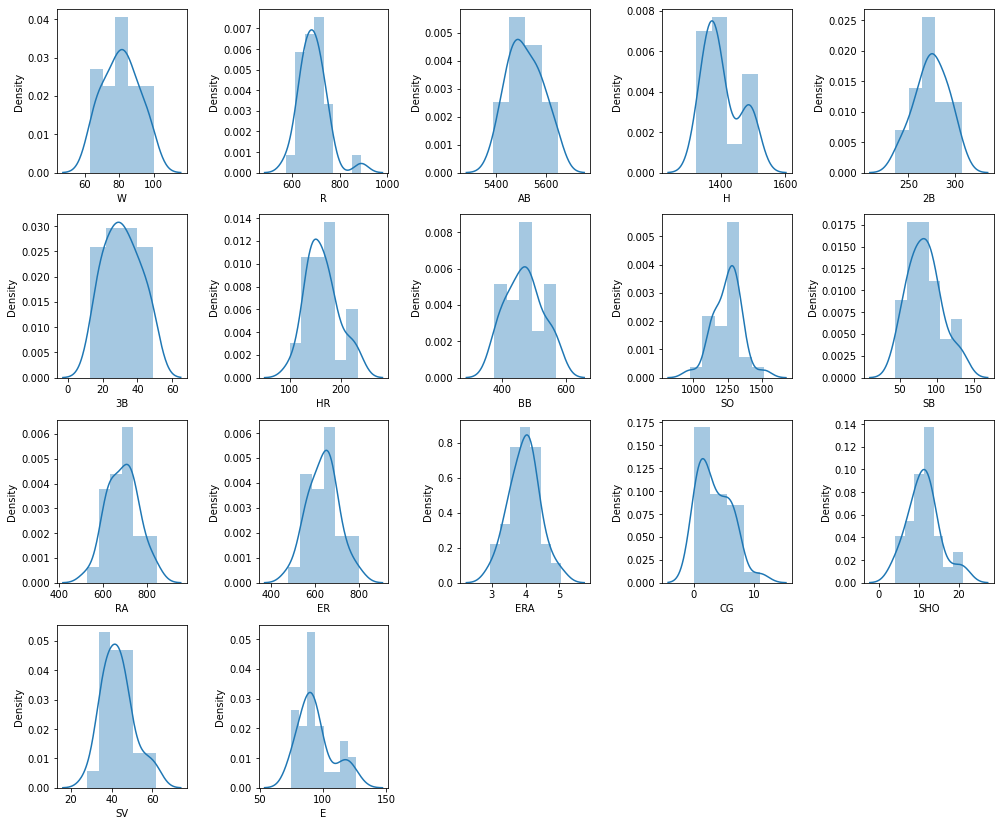

In [17]:
#Using plots to display the data
plt.figure(figsize = (14,14))
pltnumber = 1

for column in df:
    if pltnumber<=17:
        ax = plt.subplot(5,5,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

As the dataset looks cleaned and some columns like E, CG,R and all having outliers/skewness.
Will conform using Boxplot visualization.

# Removing Outliers Using Z-score method

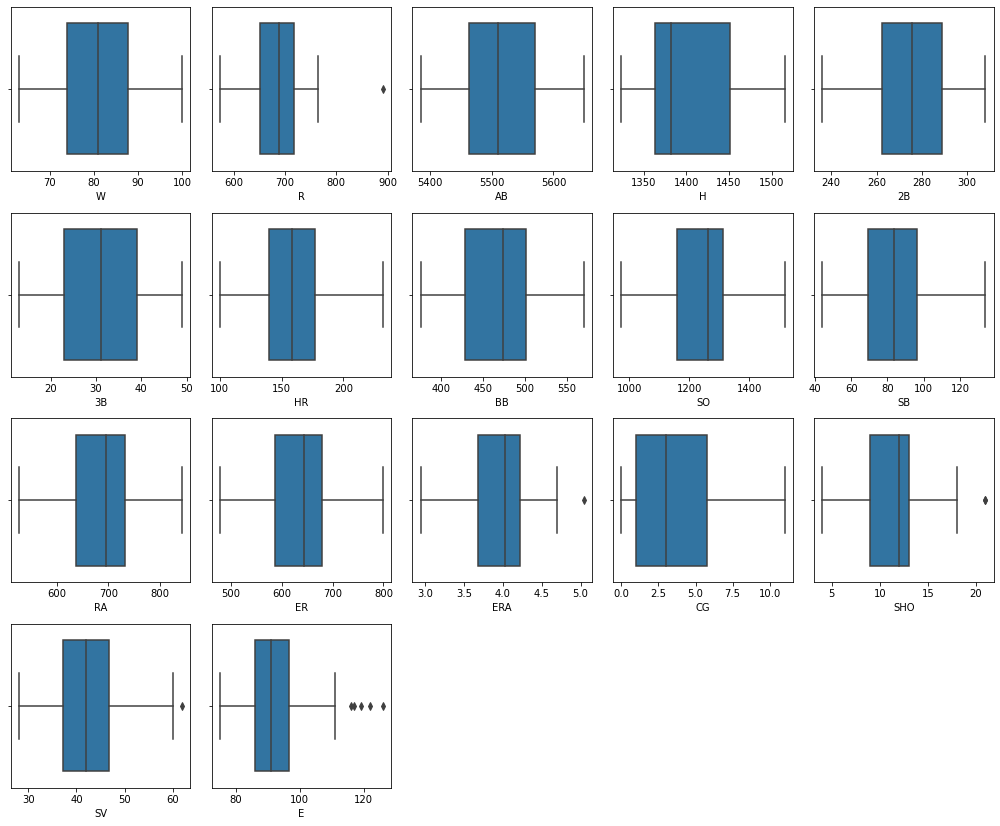

In [18]:
#Using boxplot to display the dataset
plt.figure(figsize = (14,14))
pltnumber = 1

for column in df:
    if pltnumber<=17:
        ax = plt.subplot(5,5,pltnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

After applying Zscore Method, we are losing around 3% data and we will check the skewness if any are present.

# Checking Skewness

In [19]:
#importing libraries
from scipy.stats import zscore

z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print("shape before and after")
print("shape before" .ljust(20),":",df.shape)
print("shape after" .ljust(20),":",df1.shape)
print("% loss" .ljust(20),":",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

shape before and after
shape before         : (30, 17)
shape after          : (29, 17)
% loss               : 3.3333333333333335


In [20]:
#Checking for skewness in the dataframe
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
1

We can see that skewness exist in some of the columns after using outliers.

# Using cuberoot function

In [21]:
 #using cuberoot function()
df1[['H','E']] = df1[['H','E']].apply(np.cbrt)

In [22]:
#Checking again for skewness
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
1

# Visualization of the dataset:

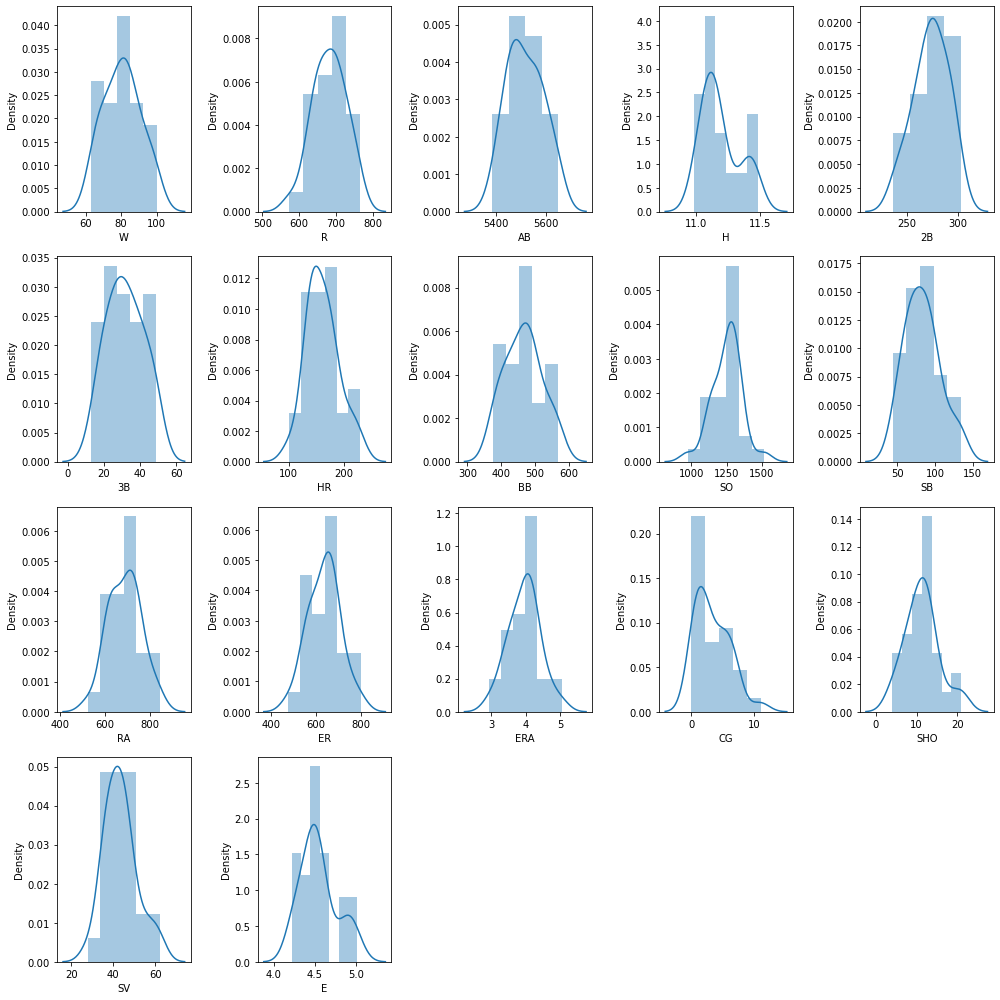

In [23]:
#Using the distplot
plt.figure(figsize = (14,14))
pltnumber = 1

for column in df1:
    if pltnumber<=17:
        ax = plt.subplot(4,5,pltnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

We can see that col ERA, RA,ER is having high correlated with each other and ERA is having correlation with target variable as well.

# Correlation of the dataset:

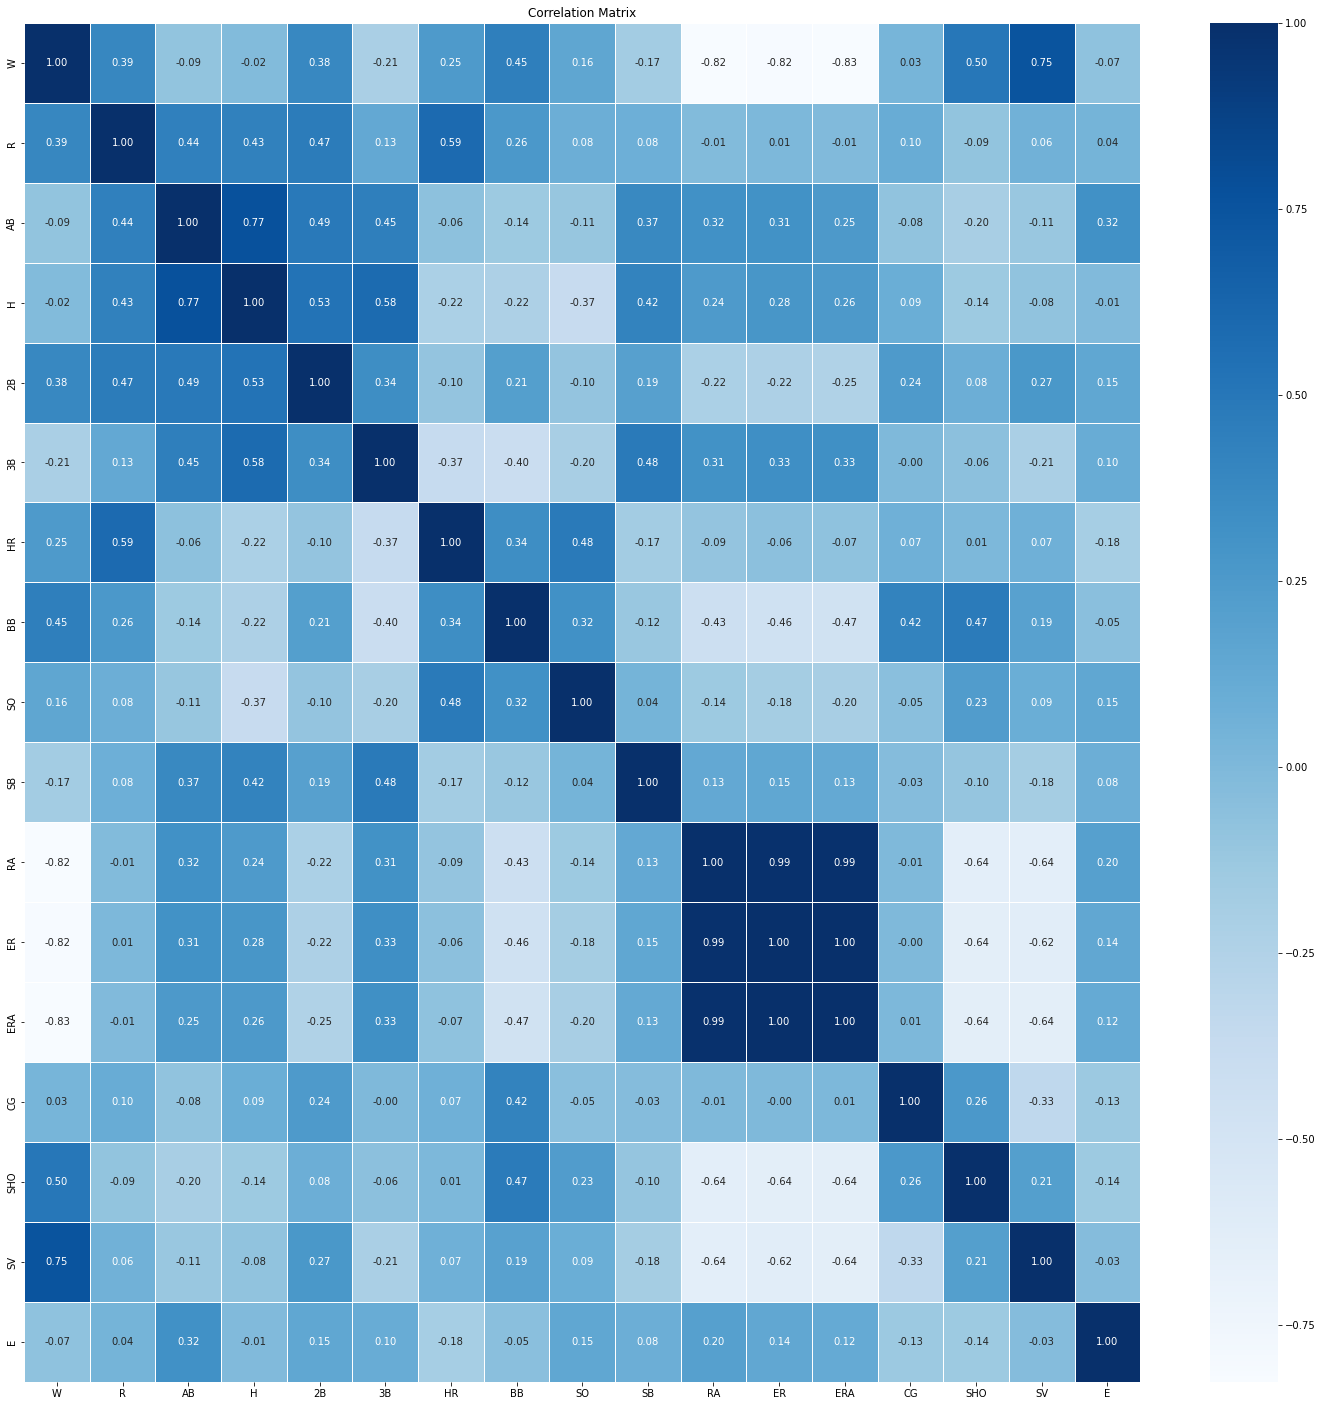

In [24]:
#Checking the correlation between features VS features or features VS target
corr = df1.corr()
plt.figure(figsize = (25,25))

#Using heatmap
sns.heatmap(corr, cmap= 'Blues',annot = True,fmt = '.2f',linewidths = 1.0)
plt.title("Correlation Matrix")
plt.show()

In [25]:
#Dropping the columns
df2 = df1.drop(columns = ['ERA'],axis = 1)

In [26]:
#Shuffling the data
df2 = df1.sample(frac =1)

In [27]:
#Splitting X and y variables
x = df1.drop(columns = ['W'],axis = 1)
y = df1['W']

In [28]:
# scaling the function in order to equalize the range of other values.

scaler = StandardScaler()  
X = scaler.fit_transform(x)

In [29]:
#Using X,Y Train tests
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 505)

# Model Building

Model 1 : Random Forest Regressor()

In [30]:
#Building a model of 4 -5 and will check the accuracy (score) of the model and then we will check over-fit and under-fit of the model and try to do hyper parameter tune for increase the efficiency of the model.

#imporgting libraries
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE", mse)
print("RMSE", np.sqrt(mse))
print("Train Score", rf.score(x_train,y_train))
print("Test Score", rf.score(x_test,y_test))

MSE 73.80908750000003
RMSE 8.591221537127304
Train Score 0.925736088934274
Test Score 0.2936929425837318


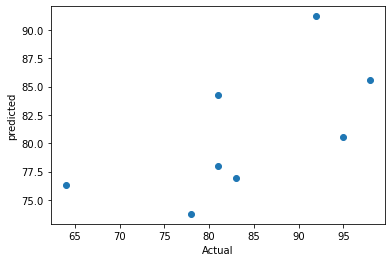

In [31]:
#Using scatterplot
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

Model 2 : Linear Regression()

In [32]:
#Importing libraries
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE", mse)
print("RMSE", np.sqrt(mse))
print("Train Score", lr.score(x_train,y_train))
print("Test Score", lr.score(x_test,y_test))

MSE 21.223418960868685
RMSE 4.606888207984722
Train Score 0.937611056996797
Test Score 0.7969050817141753


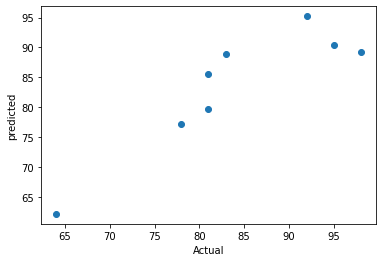

In [33]:
#Using scatterplot
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

Model 3 : Ada Boost Regressor()

In [34]:
#Importing libraries 
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
y_pred = abr.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))
print("R2 Score", r2_score(y_test, y_pred))
print("Train Data score:" , abr.score(x_train,y_train))
print("Test On TrainDataSet score:" ,  abr.score(x_test,y_test))

RMSE : 8.290565253480745
R2 Score 0.342263423710792
Train Data score: 0.9893033817711803
Test On TrainDataSet score: 0.342263423710792


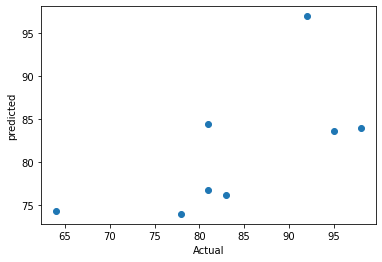

In [35]:
#Using scatterplot
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

Model 4 : K Neighbors Regressor()

In [36]:
#Importing libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)

print("r2_Score", r2_score(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", knr.score(x_train,y_train))
print("Test Score", knr.score(x_test,y_test))

r2_Score 0.40636363636363637
MSE 62.035
RMSE 7.876230062663228
Train Score 0.6817443371704421
Test Score 0.40636363636363637


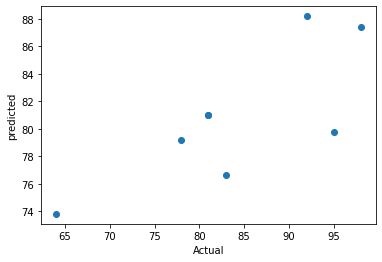

In [37]:
#Using scaTTERPLOT
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

As observed, i have trained all the modelS and got the test and train score.
Furthere I will check whether the model is over-fit or under-fit using cross_val_score() method.

In [38]:
#Using cross_val_score() method.
score1 = np.mean(cross_val_score(rf,x,y, cv = 5))  
print("random Forest", score1)

random Forest -0.6456808815325176


In [39]:
#Checking for model 2
score2 = np.mean(cross_val_score(lr,x,y, cv = 5)) 
print("Linear", score2)

Linear 0.04108246170571357


In [40]:
score3 = np.mean(cross_val_score(abr,x,y, cv = 5))  
print("Ada Boost", score3)

Ada Boost -0.6146412856325876


In [41]:
score5 = np.mean(cross_val_score(knr,x,y, cv = 5)) 
print("KNR", score5)

KNR -0.3713747420468805


After applying cross validation score method, I am choosing the best model as "RANDOM FOREST REGRESSOR" and I have choosen the best model based on the difference between model score and cross_val_Score and model which is having less % differnece is taken as best model.

# Hyper parameter tuning

In [42]:
#Using hyper parameter
param = {'n_estimators': [100], 'criterion':['mse'], 'max_depth':[2,4,6,8,10,12], 
         'min_samples_split':[2], 'min_samples_leaf':[1],
      'max_features':['auto'], 'max_leaf_nodes':[3,6,9,12,15],'random_state':[555],
          'max_samples':[2,4,6,8,10,12,]
        }

In [43]:
gs = GridSearchCV(rf, param_grid = param, cv = 5)

In [44]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': ['auto'],
                         'max_leaf_nodes': [3, 6, 9, 12, 15],
                         'max_samples': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100], 'random_state': [555]})

In [45]:
gs.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': 9,
 'max_samples': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 555}

In [46]:
#Using RandomForestRegressor
model = RandomForestRegressor(n_estimators = 50, criterion = 'mse',random_state = 555,max_depth =12 ,
                          min_samples_split = 2, min_samples_leaf=1,max_features= 'auto',max_leaf_nodes = 12,max_samples= 12)
model.fit(x_train,y_train)
Pred = model.predict(x_test)

print("r2_Score", r2_score(y_test,Pred))
print("MSE",metrics.mean_squared_error(y_test,Pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,Pred)))
print("Train Score", model.score(x_train,y_train))
print("Test Score", model.score(x_test,y_test))

r2_Score 0.28517033492822985
MSE 74.69969999999998
RMSE 8.642898819261971
Train Score 0.8243462681024879
Test Score 0.28517033492822985


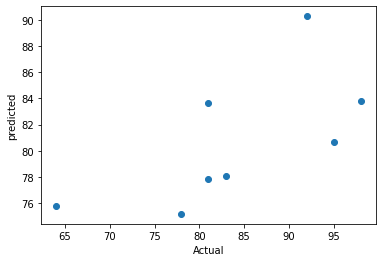

In [47]:
#Using scatterplot to view the data
plt.scatter(y_test,Pred)
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.show()

We can see the model has increased the efficiency to 62% and from the graph we can see the number of residuals are near to the best fit line and graph is linear.